# Helper Functions

In [1]:
import matplotlib.pyplot as plt
def cv2_imshow(img):
    plt.figure(figsize=[5,5])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [2]:
from urllib.request import urlopen
def urlToImage(url:str):
    req = urlopen(url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
    return img

In [3]:
def drawFeatures(features, image, color = [0, 255, 0]):
    for key in features.keys():
        if key in ['Left_eye', 'Right_eye', 'Mouth']:
            feat = features[key]
            rect = [(feat['center'][0], feat['center'][1]),(feat['width'], feat['height']), feat['rotation']]
            box = np.int0(cv2.boxPoints(rect))
            image = cv2.drawContours(image, [box], 0, color, 2)
    return image
    

# Feature Extractor

In [ ]:
import cv2
import numpy as np
from utils.FeatureExtractor import FeatureExtractor

In [ ]:
# class FeatureExtractor2(FeatureExtractor):
#     def __init__(self, image):
#         super().__init__(image)

#     # Main method that extracts different features
#     def extractFeatures2(self, faceOrient=True, extractMouth=True, compress=False):
#         """ 
#         A quick guide to different features IDs

#         Left Eye Left Point --> 130
#         Left Eye Right Point --> 243
#         Left Eye Upper Point --> 27
#         Left Eye Lower Point --> 23

#         Right Eye Left Point --> 463
#         Right Eye Right Point --> 359
#         Right Eye Upper Point --> 257
#         Right Eye Lower Point --> 253

#         Face Center Point --> 5
#         Face Left Point --> 93
#         Face Right Point --> 323

#         Mouth Left Point --> 61
#         Mouth Right Point --> 291
#         Upper Lip Upper Point --> 0
#         Upper Lip Lower Point --> 13
#         Lower Lip Upper Point --> 14
#         Lower Lip Lower Point --> 17

#         Hat Center --> 10
#         """

#         # Call the processImg() method
#         height, width, _ = self.processImg(compress)

#         # Proceed if face landmarks are detected
#         if self.__results.multi_face_landmarks != None:
#             counter = 0  # Keeps track of number of faces
            
#             for facial_landmarks in self.__results.multi_face_landmarks:
#                 landmarks = facial_landmarks.landmark

#                 """ Left Eye Attributes """
#                 leftEyeW = self.__calcDistance(landmarks[130], landmarks[243], width, height)  # Width
#                 leftEyeH = self.__calcDistance(landmarks[27], landmarks[23], width, height)  # Height
#                 leftEyeMid = self.__midpoint(landmarks[27], landmarks[23], width, height)  # Midpoint

#                 leftEyeDX = int((landmarks[130].x) * width) - int((landmarks[243].x) * width)
#                 leftEyeDY = int((landmarks[130].y) * height) - int((landmarks[243].y) * height)
#                 leftEyeAngle = round((np.degrees(np.arctan2(leftEyeDY, leftEyeDX)) - 180))  # Rotation Angle

#                 """ Right Eye Attributes """
#                 rightEyeW = self.__calcDistance(landmarks[463], landmarks[359], width, height)  # Width
#                 rightEyeH = self.__calcDistance(landmarks[257], landmarks[253], width, height)  # Height
#                 rightEyeMid = self.__midpoint(landmarks[257], landmarks[253], width, height)  # Midpoint

#                 rightEyeDX = int((landmarks[463].x) * width) - int((landmarks[359].x) * width)
#                 rightEyeDY = int((landmarks[463].y) * height) - int((landmarks[359].y) * height)
#                 rightEyeAngle = round((np.degrees(np.arctan2(rightEyeDY, rightEyeDX)) - 180))  # Rotation Angle

#                 """ Hat Attributes """
#                 hatCenterX = int((landmarks[10].x) * width)
#                 hatCenterY = int((landmarks[10].y) * height)
#                 hatCenter = [hatCenterX, hatCenterY]  # Center
#                 hatAngle = round((np.degrees(np.arctan2(hatCenterX, hatCenterY)) - 180))  # Rotation Angle

#                 # Update the features dictionary
#                 self.__features['Left_eye'] = {'rotation': leftEyeAngle, 'width': leftEyeW, 'height': leftEyeH,
#                                                         'center': leftEyeMid}
#                 self.__features['Right_eye'] = {'rotation': rightEyeAngle, 'width': rightEyeW, 'height': rightEyeH,
#                                                         'center': rightEyeMid}
#                 self.__features['Hat'] = {'rotation': hatAngle, 'center': hatCenter}

#                 # Find the face orientation if requested by the user
#                 if faceOrient:
#                     faceLeftPt = [int((landmarks[93].x) * width), int((landmarks[93].y) * height)]
#                     faceRightPt = [int((landmarks[323].x) * width), int((landmarks[323].y) * height)]
#                     faceCenterPt = [int((landmarks[5].x) * width), int((landmarks[5].y) * height)]
                    
#                     left2cen_dis = int(self.__euclideanDistance(faceLeftPt[0], faceLeftPt[1], faceCenterPt[0], faceCenterPt[1]))  # Left to center margin
#                     right2cen_dis = int(self.__euclideanDistance(faceRightPt[0], faceRightPt[1], faceCenterPt[0], faceCenterPt[1]))  # Right to center margin

#                     diff = abs(left2cen_dis - right2cen_dis)  # Margins difference
#                     if diff > 10:
#                         if left2cen_dis < right2cen_dis:
#                             pos = 'Left'
#                         elif left2cen_dis > right2cen_dis:
#                             pos = 'right'
#                         else:
#                             pos = 'center'
#                     else:
#                         pos = 'center'

#                     # Update the features dictionary
#                     self.__features['Face'] = {'orientation': pos}

#                 if extractMouth:
#                     mouthDX = int((landmarks[61].x) * width) - int((landmarks[291].x) * width)
#                     mouthDY = int((landmarks[61].y) * height) - int((landmarks[291].y) * height)
#                     mouthW = self.__calcDistance(landmarks[61], landmarks[291], width, height)  # Width
#                     mouthH = self.__calcDistance(landmarks[0], landmarks[17], width, height)  # Height
#                     mouthCenter = self.__midpoint(landmarks[13], landmarks[14], width, height)  # Center
#                     mouthRotation = round((np.degrees(np.arctan2(mouthDY, mouthDX)) - 180)) #
#                     # Update the features dictionary
#                     self.__features['Mouth'] = {'center': mouthCenter, 'width': mouthW, 'height': mouthH, 'rotation': mouthRotation}

#                 counter += 1
            
#             return self.__features

In [ ]:
# img = cv2.imread('Test_data/Test1.jpeg')

# fe = FeatureExtractor2(img)
# features = fe.extractFeatures(faceOrient=True, extractMouth=True, compress=False).copy()
# print(features)

# features2 = fe.extractFeatures2(faceOrient=True, extractMouth=True, compress=False).copy()
# print(features2)

In [ ]:
# output_image = img.copy()

# color = [255, 0, 0]

# output_image = drawFeatures(output_image, features, color)

# color = [0, 255, 0]

# output_image = drawFeatures(output_image, features, color)

# cv2_imshow(output_image)
# cv2.imwrite('output.jpeg', output_image)

# Server Test

In [11]:
import requests
import json
import numpy as np
import cv2
baseUrl = "http://127.0.0.1:5001/mask"

In [ ]:
url = f"{baseUrl}/image?img=/static/output/grey_img_5terre.jpg"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

{'data': [{'face': 'http://127.0.0.1:5001/static/output/_0_GettyImages-1092658864_thumb-732x549.jpg', 'features': {'Face': {'orientation': 'center'}, 'Hat': {'center': [328, 155], 'rotation': -115}, 'Left_eye': {'center': [274.0, 263.0], 'height': 25.238859176635742, 'rotation': -178.09085083007812, 'width': 60.0333251953125}, 'Mouth': {'center': [339.5, 389.5], 'height': 31.064449310302734, 'rotation': 177.37359619140625, 'width': 109.11461639404297}, 'Right_eye': {'center': [390.5, 259.0], 'height': 28.160255432128906, 'rotation': 174.1932830810547, 'width': 59.304298400878906}}}]}


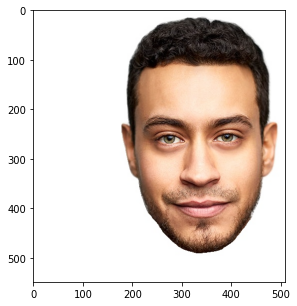

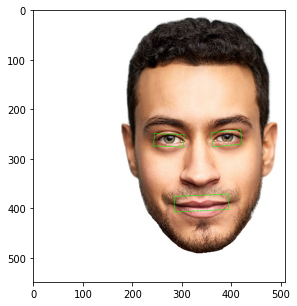

True

In [24]:
# imageUrl = "https://images.unsplash.com/photo-1648817976872-3d43d615b329"
imageUrl = "https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_thumb-732x549.jpg"

url = f"{baseUrl}/segment?image={imageUrl}"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

# print(response.text)
json_data = json.loads(response.text)
print(json_data)
image = urlToImage(json_data['data'][0]['face'])
# image = urlToImage(imageUrl)
# image = cv2.imread('./static/output/_0_GettyImages-1092658864_thumb-732x549.jpg')
cv2_imshow(image)
json_data['data'][0]['features']['Face']['orientation']
output_image = image.copy()

output_image = drawFeatures(json_data['data'][0]['features'], output_image)

cv2_imshow(output_image)
cv2.imwrite('output.jpeg', output_image)

In [ ]:
url = f"{baseUrl}/features?image=https://post.medicalnewstoday.com/wp-content/uploads/sites/3/2020/03/GettyImages-1092658864_thumb-732x549.jpg"

payload={}
headers = {}

response = requests.request("GET", url, headers=headers, data=payload)

# print(response.text)
json_data = json.loads(response.text)
print(json_data)
json_data['data']['Face']['orientation']

In [6]:
# import cv2
# import mediapipe
# import numpy as np
# from models.parser import face_parser
# from tensorflow.compat.v1.keras import backend as K
# from config import MIN_CONF, MIN_CONF_FACE, COMPRESS_PCT, SEGMENT_CONF

# "A class that encapsulates all functionalities needed"
# class FeatureExtractor:
#     # The constructor only needs the input image
#     def __init__(self, image):
#         self.img = image
#         self.__results = []  # Mediapipe output
#         self.__features = {}  # A dictionary to store features

#     # Compress input image to a certain percentage (Default is 30%)
#     def __compressImg(self, percentage=COMPRESS_PCT):
#         newWidth = int(self.img.shape[1] * percentage)
#         newHeight = int(self.img.shape[0] * percentage)
#         newDim = (newWidth, newHeight)  # Width and height after compression

#         compressedImg = cv2.resize(self.img, newDim, interpolation = cv2.INTER_AREA)  # Resize to the new dimensions
#         return compressedImg

#     # Calls the compressImg() method and flips Red and Blue channels
#     def __processImg(self, compress):
#         if compress:
#             compressedImg = self.__compressImg()
#             copiedImg = compressedImg.copy()  
#         else:
#             copiedImg = self.img.copy()

#         formattedImg = cv2.cvtColor(copiedImg, cv2.COLOR_BGR2RGB)

#         face = mediapipe.solutions.face_mesh.FaceMesh(static_image_mode=True, max_num_faces=6, min_detection_confidence=MIN_CONF)

#         self.__results = face.process(formattedImg)  # Run the FaceMesh module from Mediapipe on the preprocessed image

#         return formattedImg.shape

#     # Helper function  to calculate the euclidean distance between two points
#     def __euclideanDistance(self, leftx, lefty, rightx, righty):
#         return np.sqrt((leftx-rightx)**2 +(lefty-righty)**2)

#     def singleContourMask(self, binary_mask):
#         contours, _ = cv2.findContours(binary_mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        
#         mask = np.zeros(binary_mask.shape, binary_mask.dtype)
#         sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
#         cv2.drawContours(mask, [sorted_contours[0]], 0, (255.0), -1)
#         mask = cv2.bitwise_not(mask)
#         removed = cv2.subtract(binary_mask, mask)
#         return removed


#     # Helper function to calculate the absolute coordinates of a landmark point
#     def __getRelativePointCoords(self, image_shape, landmark):
#         """
#         This function returns the coordinates of a specified point on the input image.
#         Args:
#             image_shape:    The input image shape.
#             landmark:       The landmark feature.
#         Returns:
#             point_coords:   The coordinates of the specified point on the input image.
#         """
#         # Get the coordinates of the specified point.
#         x = int(landmark.x * image_shape[1])
#         y = int(landmark.y * image_shape[0])
#         point_coords = (x, y)
#         # Return the coordinates of the specified point relative to the top left corner of the input image.
#         return point_coords

#     landmarkDict = {
#         #Left, Right, Upper, Lower
#         "left_eye": [130,243,27,33],
#         "right_eye": [463,359,257,253],
#         "mouth": [61,291,0,17]
#     }

#     # Calculate features for landmarks
#     def __calc(self, landmarks, entity, shape):
#         if entity in self.landmarkDict:
#             l1, l2 = landmarks[self.landmarkDict[entity][0]], landmarks[self.landmarkDict[entity][1]]
#             l3, l4 = landmarks[self.landmarkDict[entity][2]], landmarks[self.landmarkDict[entity][3]]
#         else:
#             return None
#         c1 = self.__getRelativePointCoords(shape, l1)
#         c2 = self.__getRelativePointCoords(shape, l2)
#         pts = np.array([c1, c2])
#         rectH = list(cv2.minAreaRect(pts))
#         c3 = self.__getRelativePointCoords(shape, l3)
#         c4 = self.__getRelativePointCoords(shape, l4)
#         pts = np.array([c3, c4])
#         rectV = list(cv2.minAreaRect(pts))

#         width = rectH[1][0]
#         rotation = rectH[2]
#         height = rectV[1][0]
#         center = rectH[0]
#         return {'rotation': rotation, 'width': width, 'height': height,
#                                                         'center': center}
    
#     # Main method that extracts different features
#     def extractFeatures(self, faceOrient=True, extractMouth=True, compress=True):
#         """ 
#         A quick guide to different features IDs

#         Left Eye Left Point --> 130
#         Left Eye Right Point --> 243
#         Left Eye Upper Point --> 27
#         Left Eye Lower Point --> 23

#         Right Eye Left Point --> 463
#         Right Eye Right Point --> 359
#         Right Eye Upper Point --> 257
#         Right Eye Lower Point --> 253

#         Face Center Point --> 5
#         Face Left Point --> 93
#         Face Right Point --> 323

#         Mouth Left Point --> 61
#         Mouth Right Point --> 291
#         Upper Lip Upper Point --> 0
#         Upper Lip Lower Point --> 13
#         Lower Lip Upper Point --> 14
#         Lower Lip Lower Point --> 17

#         Hat Center --> 10
#         """
#         # Call the processImg() method
#         height, width, _ = self.__processImg(compress)

#         height, width = self.img.shape[:2]
#         # Proceed if face landmarks are detected
#         if self.__results.multi_face_landmarks != None:
#             counter = 0  # Keeps track of number of faces
            
#             for facial_landmarks in self.__results.multi_face_landmarks:
#                 landmarks = facial_landmarks.landmark
#                 # Update the features dictionary
#                 self.__features['Left_eye'] = self.__calc(landmarks, "left_eye", (height, width))
#                 self.__features['Right_eye'] = self.__calc(landmarks, "right_eye", (height, width))

#                 """ Hat Attributes """
#                 hatCenterX = int((landmarks[10].x) * width)
#                 hatCenterY = int((landmarks[10].y) * height)
#                 hatCenter = [hatCenterX, hatCenterY]  # Center
#                 hatAngle = round((np.degrees(np.arctan2(hatCenterX, hatCenterY)) - 180))  # Rotation Angle
#                 # Update the features dictionary
#                 self.__features['Hat'] = {'rotation': hatAngle, 'center': hatCenter}

#                 # Find the face orientation if requested by the user
#                 if faceOrient:
#                     faceLeftPt = [int((landmarks[93].x) * width), int((landmarks[93].y) * height)]
#                     faceRightPt = [int((landmarks[323].x) * width), int((landmarks[323].y) * height)]
#                     faceCenterPt = [int((landmarks[5].x) * width), int((landmarks[5].y) * height)]
                    
#                     left2cen_dis = int(self.__euclideanDistance(faceLeftPt[0], faceLeftPt[1], faceCenterPt[0], faceCenterPt[1]))  # Left to center margin
#                     right2cen_dis = int(self.__euclideanDistance(faceRightPt[0], faceRightPt[1], faceCenterPt[0], faceCenterPt[1]))  # Right to center margin

#                     diff = abs(left2cen_dis - right2cen_dis)  # Margins difference
#                     if diff > 10:
#                         if left2cen_dis < right2cen_dis:
#                             pos = 'Left'
#                         elif left2cen_dis > right2cen_dis:
#                             pos = 'right'
#                         else:
#                             pos = 'center'
#                     else:
#                         pos = 'center'

#                     # Update the features dictionary
#                     self.__features['Face'] = {'orientation': pos}

#                 if extractMouth:
#                     # Update the features dictionary
#                     self.__features['Mouth'] = self.__calc(landmarks, "mouth", (height, width))

#                 counter += 1
            
#             return self.__features


#     # Helper function
#     def __resizeImage(self, im, max_size=768):
#         if np.max(im.shape) > max_size:
#             ratio = max_size / np.max(im.shape)
#             return cv2.resize(im, (0,0), fx=ratio, fy=ratio)

#         return im


#     # Returns a list of all faces detected
#     def __detectFace(self, images):
#         try:
#             faces = []
#             prs = face_parser.FaceParser()

#             for image in images:
#                 # Resize image
#                 image = self.__resizeImage(image)

#                 output_image = image.copy()

#                 segmentation_output = prs.parse_face(image)[0]
                
#                 binary_mask = np.ones(shape=[segmentation_output.shape[0],segmentation_output.shape[1]]) * 255
#                 # binary_mask[segmentation_output==17] = 0 # HAIR
#                 binary_mask[segmentation_output==16] = 0 # CLOTHES
#                 binary_mask[segmentation_output==15] = 0 # ??
#                 binary_mask[segmentation_output==14] = 0 # NECK
#                 binary_mask[segmentation_output==0] = 0 # BACKGROUND

#                 # Enlarge the mask
#                 dilatation_size = 3
#                 dilatation_type = cv2.MORPH_CROSS
#                 element = cv2.getStructuringElement(dilatation_type,(2*dilatation_size + 1, 2*dilatation_size+1),(dilatation_size, dilatation_size))
#                 # binary_mask = cv2.dilate(binary_mask, element)
#                 binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, element)
#                 # apply smoothing to the mask
#                 blur_level = 2
#                 binary_mask = cv2.blur(binary_mask, (blur_level, blur_level))

#                 # blur alpha channel
#                 binary_mask = cv2.GaussianBlur(binary_mask, (0,0), sigmaX=2, sigmaY=2, borderType = cv2.BORDER_DEFAULT)
#                 import skimage
#                 binary_mask = skimage.exposure.rescale_intensity(binary_mask, in_range=(127.5, 255), out_range=(0,255))


#                 binary_mask[segmentation_output==17] = 255 # HAIR
#                 binary_mask = self.singleContourMask(binary_mask)
                
#                 output_image[binary_mask<127.5] = 255

#                 faces.append(np.dstack((output_image, binary_mask)))
#             K.clear_session()
#             return faces
#         except Exception as e:
#             # print(e)
#             K.clear_session() 

#     # Segments all faces detected
#     def segmentFace(self, image):
#         # Get the height and width of the input image.
#         try:
#             image_height, image_width, _ = image.shape

#             cropped_images = []

#             mp_face_detection = mediapipe.solutions.face_detection
#             mp_face_detector = mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=MIN_CONF_FACE)

#             # Perform the face detection on the image.
#             results = mp_face_detector.process(image)
#             # print(results.detections)
#             croppedFaces = []

#             # Check if the face(s) in the image are found.
#             if results.detections:

#                 # Iterate over the found faces.
#                 for face_no, face in enumerate(results.detections):
#                     # print(face_no)
#                     face_bbox = face.location_data.relative_bounding_box

#                     # Retrieve the required bounding box coordinates and scale them according to the size of original input image.
#                     x1 = int(face_bbox.xmin * image_width)
#                     y1 = int(face_bbox.ymin * image_height)

#                     bbox_width = int(face_bbox.width * image_width)
#                     bbox_height = int(face_bbox.height * image_height)

#                     x2 = x1 + bbox_width
#                     y2 = y1 + bbox_height

#                     # Add some padding
#                     x1 = x1 - int(bbox_width / 2)
#                     y1 = y1 - int((bbox_height / 2) * 1.3)
#                     x2 = x2 + int(bbox_width / 2)
#                     y2 = y2 + int((bbox_height / 2) * 1.3)

#                     if x1 < 0:
#                         x1 = 0

#                     if y1 < 0:
#                         y1 = 0

#                     if x2 > image_width:
#                         x2 = image_width

#                     if y2 > image_height:
#                         x2 = image_height
                    
#                     face_crop = image[y1:y2, x1:x2]
#                     # cv2.imwrite("OUTPUT.png", face_crop)
#                     cropped_images.append(face_crop)
                
#                 croppedFaces = self.__detectFace(cropped_images)
#                 # for i, face in enumerate(croppedFaces):
#                 #     color = [255, 255, 255]
#                 #     delta_w = image_width - face.shape[1]
#                 #     delta_h = image_height - face.shape[0]
#                 #     croppedFaces[i] = cv2.copyMakeBorder(face, 0, delta_h, 0, delta_w, cv2.BORDER_CONSTANT,
#                 #         value=color)
#                 K.clear_session()
#                 return croppedFaces
#             else:   
#                 raise Exception("No faces found in the image.")
#         except Exception as e:    
#             print(e)
#             K.clear_session()    


#     # Upscales the image using super resolution
#     def upscale(self, scalar):
#         scaling_dict = {'2': "models/EDSR_x2.pb", '4': "models/EDSR_x4.pb"}  # A dict to select the appropriate model

#         sr = cv2.dnn_superres.DnnSuperResImpl_create()  # SR opencv object

#         path = scaling_dict[scalar]

#         # Read and set the selected model
#         sr.readModel(path)
#         sr.setModel("edsr", int(scalar))

#         # Upscales the input image
#         copiedImg = self.img.copy()
#         result = sr.upsample(copiedImg)

#         return result

# Fixes

In [25]:
from utils.FeatureExtractor import FeatureExtractor
import cv2
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


10


d:\GitHub\Facial_features_extraction\env\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


1


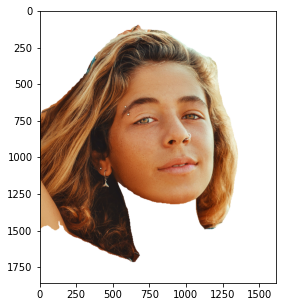

{'Left_eye': {'rotation': 172.79750061035156, 'width': 183.44754028320312, 'height': 95.58765411376953, 'center': (721.0, 762.5)}, 'Right_eye': {'rotation': 174.8826904296875, 'width': 134.53623962402344, 'height': 90.19977569580078, 'center': (1029.0, 730.0)}, 'Hat': {'rotation': -120, 'center': [858, 503]}, 'Face': {'orientation': 'right'}, 'Mouth': {'rotation': 171.47972106933594, 'width': 269.9796142578125, 'height': 120.33702850341797, 'center': (945.5, 1065.0)}}


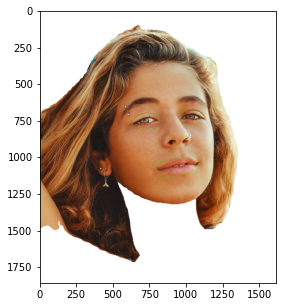

In [30]:
def runAllTests():
    for i in range(10,11):
        print(i)
        image = cv2.imread(f"Test_data/Test{i}.jpg")
        fe = FeatureExtractor(image)
        segment = fe.segmentFace(image)
        # print(segment)
        if segment is not None:
            print(len(segment))

            for idx, seg in enumerate(segment):
                seg = seg.astype(np.uint8)
                cv2_imshow(seg)
                fe.img = seg.copy()
                try:
                    json_data = fe.extractFeatures()
                    print(json_data)
                    output_image = drawFeatures(json_data, seg)

                    cv2_imshow(output_image)
                    cv2.imwrite(f'output/{i}_face_{idx}.png', output_image)
                except Exception as e:
                    print(e)
                    pass
                
        else:
            print("No faces found")
runAllTests()